In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook
from IPython.display import clear_output

dt = 0.01
T = 1000
t = np.arange(0,T,dt)

def F(x1,y1,x2,y2,m1,m2 ):
    G = 6.6740831e-11
    r = ((x1-x2)**2 + (y1-y2)**2)**0.5
    F_t = G * m1*m2/(r**2)
    alpha = np.arctan2((y1 - y2),(x1 - x2))
    Fx = - np.cos(alpha) * F_t
    Fy = - np.sin(alpha) * F_t
    #print(F_t)

    return (Fx, Fy)

In [2]:
y1 = np.zeros(len(t))
y2 = np.zeros(len(t))
y3 = np.zeros(len(t))

x1 = np.zeros(len(t))
x2 = np.zeros(len(t))
x3 = np.zeros(len(t))

v1 = np.zeros(len(t))
v2 = np.zeros(len(t))
v3 = np.zeros(len(t))

u1 = np.zeros(len(t))
u2 = np.zeros(len(t))
u3 = np.zeros(len(t))

# initial conditions

select a case by changing the code from markdown to code

In [11]:
## figure 8


m = 15_000_000_000 

x1[0] = 0.97000436
y1[0] = -0.24308753
u1[0] = 0.93240737/2
v1[0] = 0.86473146/2
m1 = m

x2[0] = -0.97000436
y2[0] = 0.24308753
u2[0] = 0.93240737/2
v2[0] = 0.86473146/2
m2 = m

x3[0] = 0
y3[0] = 0
u3[0] = -0.93240737
v3[0] = -0.86473146
m3 = m

In [12]:
# ## Earth Moon, sun

# m1 = 60000000000
# m3 = 60000000
# m2 = 6000

# x1[0] = 0
# y1[0] = 0
# u1[0] = 0
# v1[0] = 0

# x2[0] = 29.2
# y2[0] = 0
# u2[0] = 0
# v2[0] = 0.35

# x3[0] = 30
# y3[0] = 0
# u3[0] = 0
# v3[0] = 0.4

In [13]:
# ## Chaos

# x1[0] = 0
# y1[0] = 0
# u1[0] = 0
# v1[0] = 0.04
# m1 = 60_000_000

# x2[0] = 6
# y2[0] = 0
# u2[0] = 0.03
# v2[0] = -0.01
# m2 = 60000000

# x3[0] = 15
# y3[0] = 0
# u3[0] = 0
# v3[0] = 0.01
# m3 = 60000000

## one central heavy planet and eliptical orbits

m1 = 60000000000
m2 = 60000000
m3 = 60000000

x1[0] = 0
y1[0] = 0
u1[0] = 0
v1[0] = 0

x2[0] = 6
y2[0] = 0
u2[0] = 0
v2[0] = 1

x3[0] = 20
y3[0] = 0
u3[0] = 0
v3[0] = 0.3

## soloar system model

m1 = 60000000000
m2 = 60000000
m3 = 60000000

x1[0] = 0
y1[0] = 0
u1[0] = 0
v1[0] = 0

x2[0] = 10
y2[0] = 0
u2[0] = 0
v2[0] = 0.6

x3[0] = 30
y3[0] = 0
u3[0] = 0
v3[0] = 0.4

# Numerical algorithm

consider newtons third law for each planet:
$$ \frac{ds}{dt} = v $$
$$ \frac{d^2 s}{d t ^2} =  \frac{dv}{dt} = a $$
$$ F = ma $$

consider newtons theorem for gravity:
$$ F = G \frac{m_1 m_2}{r^2}$$

apply Euler Foreward time discretisation
$$ \frac{\partial x}{\partial t} = \frac{x_2 - x_1}{\Delta t}$$

In [14]:
q = int(0)
qq = 1
for i in range(len(t)-1):
    q = q + int(1)
    if q == 10000:
        clear_output(wait= True)
        print(np.round(qq/ len(t)*1000000,3), '%')
        q = int(0)
        qq +=1
        
    x1[i+1] = x1[i] + u1[i]*dt
    y1[i+1] = y1[i] + v1[i]*dt
    
    x2[i+1] = x2[i] + u2[i]*dt
    y2[i+1] = y2[i] + v2[i]*dt
    
    x3[i+1] = x3[i] + u3[i]*dt
    y3[i+1] = y3[i] + v3[i]*dt
    
    u1[i+1] = u1[i] + (F(x1[i],y1[i],x2[i],y2[i], m1, m2)[0]+F(x1[i],y1[i],x3[i],y3[i], m1, m3)[0])/m1 *dt
    v1[i+1] = v1[i] + (F(x1[i],y1[i],x2[i],y2[i], m1, m2)[1]+F(x1[i],y1[i],x3[i],y3[i], m1, m3)[1])/m1 *dt

    u2[i+1] = u2[i] + (F(x2[i],y2[i],x1[i],y1[i], m2, m1)[0]+F(x2[i],y2[i],x3[i],y3[i], m2, m3)[0])/m2 *dt
    v2[i+1] = v2[i] + (F(x2[i],y2[i],x1[i],y1[i], m2, m1)[1]+F(x2[i],y2[i],x3[i],y3[i], m2, m3)[1])/m2 *dt

    u3[i+1] = u3[i] + (F(x3[i],y3[i],x1[i],y1[i], m3, m1)[0]+F(x3[i],y3[i],x2[i],y2[i], m3, m2)[0])/m3 *dt
    v3[i+1] = v3[i] + (F(x3[i],y3[i],x1[i],y1[i], m3, m1)[1]+F(x3[i],y3[i],x2[i],y2[i], m3, m2)[1])/m3 *dt
    

90.0 %


<IPython.core.display.Javascript object>


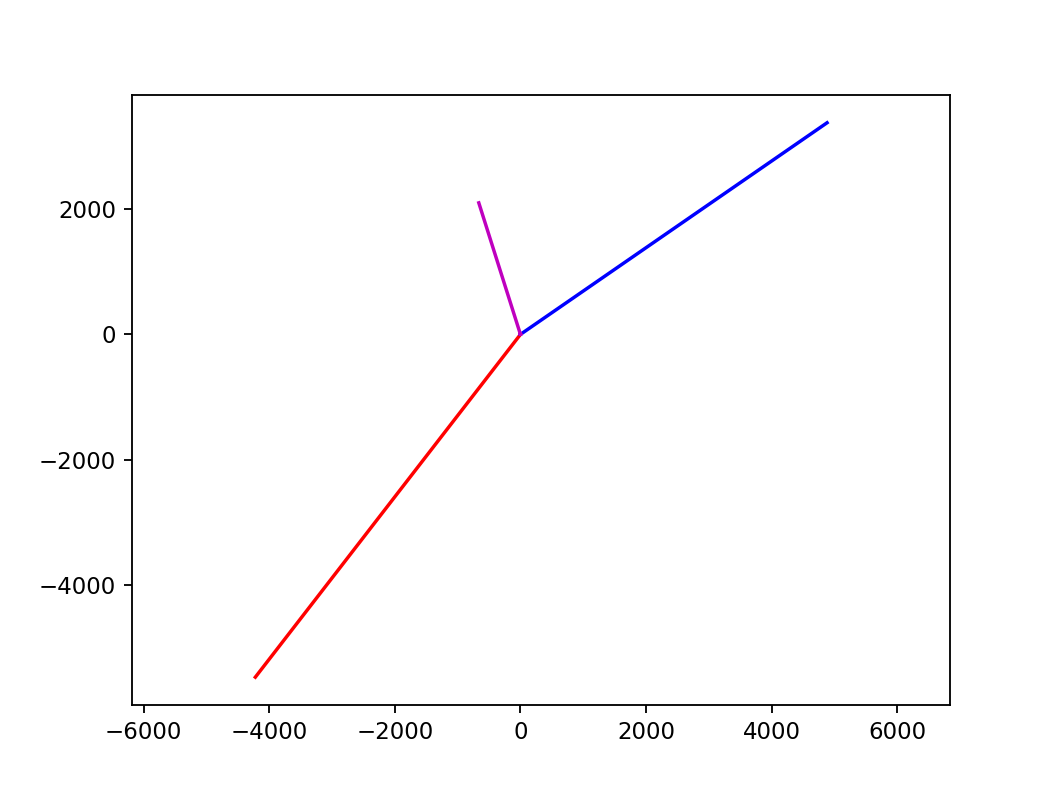

In [20]:
# Total plot
%matplotlib notebook

ax = plt.subplot()
ax.axis('equal')
plt.plot(x2[:],y2[:],'r')
plt.plot(x1[:],y1[:],'b')
plt.plot(x3[:],y3[:],'m')
plt.show()

<IPython.core.display.Javascript object>


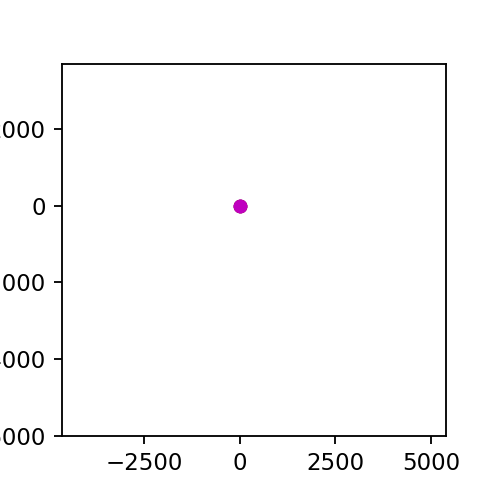

In [21]:
# Animation

import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

Q = 100
fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111, aspect='equal', xlim=(np.min((x1,x2,x3))*1.1, np.max((x1,x2,x3))*1.1), ylim=(np.min((y1,y2,y3))*1.1, np.max((y1,y2,y3))*1.1))

l1, = ax.plot([x1[Q]],[y1[Q]],'bo', markersize  =5)
l2, = ax.plot(x1[:Q],y1[:Q],'b', linewidth = 2)
l3, = ax.plot([x2[Q]],[y2[Q]],'ro', markersize  =5)
l4, = ax.plot(x2[:Q],y2[:Q],'r', linewidth = 2)
l5, = ax.plot([x3[Q]],[y3[Q]],'mo', markersize  =5)
l6, = ax.plot(x3[:Q],y3[:Q],'m', linewidth = 2)


def inter(i):
    i=i+Q
    l1.set_data(x1[i], y1[i])
    l2.set_data(x1[i-Q:i], y1[i-Q:i])
    l3.set_data(x2[i], y2[i])
    l4.set_data(x2[i-Q:i], y2[i-Q:i])
    l5.set_data(x3[i], y3[i])
    l6.set_data(x3[i-Q:i], y3[i-Q:i])

    return l1,l2,l3,l4,l5,l6

anim = animation.FuncAnimation(fig, inter, frames = len(t), interval = dt*100, repeat = True)

# anim.save('figure_8.gif')